In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils

/home/p3rzival/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
name = "Merging"

In [3]:
df = pd.read_csv('summary/summarized_data.csv', index_col=['ViT Name'])
df["Accuracy"] = df["Accuracy"]/100

In [ ]:
original_acc = df.filter(regex="ViT-Defa*", axis=0)["Accuracy"].item()
original_time = df.filter(regex="ViT-Defa*", axis=0)["Total Latency"].item()
original_mem = df.filter(regex="ViT-Defa*", axis=0)["Max Mem use"].item()

In [ ]:
prunning_data = df.filter(regex='ViT-Merg*', axis=0)
prunning_data["Prunning"] = [10, 15, 20, 25, 30, 5]
prunning_data["Mem Latency"] = round(prunning_data["Mem Latency"], 1)
prunning_data["Max Mem use"] = 344
prunning_data["Accuracy"] = 1 - prunning_data["Accuracy"]
prunning_data = prunning_data.sort_values("Prunning", ascending=True)

/tmp/ipykernel_12269/820625283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prunning_data["Prunning"] = [10, 15, 20, 25, 30, 5]
/tmp/ipykernel_12269/820625283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prunning_data["Mem Latency"] = round(prunning_data["Mem Latency"], 1)
/tmp/ipykernel_12269/820625283.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

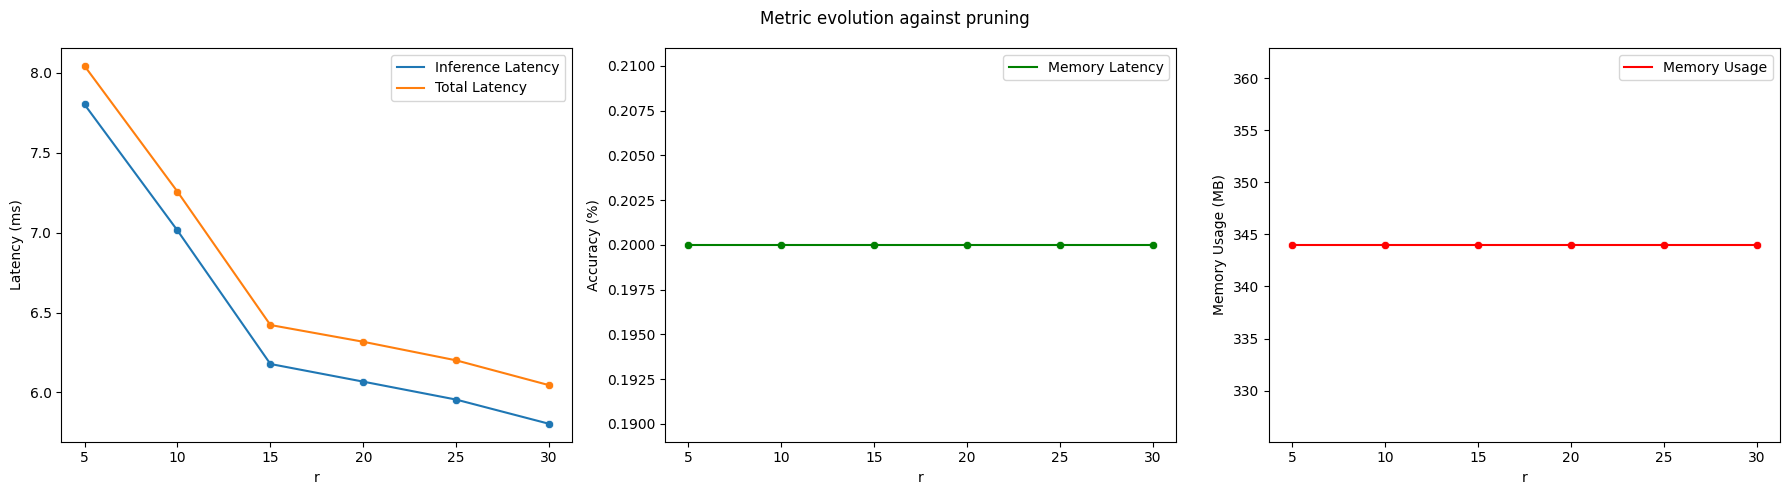

In [6]:
fig, axes = plt.subplots(1,3, figsize=(18, 5))
sns.lineplot(prunning_data, x="Prunning", y="Inference Latency",errorbar=None, label="Inference Latency", ax=axes[0])
sns.lineplot(prunning_data, x="Prunning", y="Total Latency",errorbar=None, label="Total Latency", ax=axes[0])
sns.scatterplot(prunning_data, x="Prunning", y="Inference Latency", ax=axes[0])
sns.scatterplot(prunning_data, x="Prunning", y="Total Latency", ax=axes[0])
axes[0].set_xlabel("r")
axes[0].set_ylabel("Latency (ms)")
axes[0].legend()

sns.lineplot(prunning_data, x="Prunning", y="Mem Latency",errorbar=None, label="Memory Latency", ax=axes[1], color='green')
sns.scatterplot(prunning_data, x="Prunning", y="Mem Latency", ax=axes[1], color='green')
axes[1].set_xlabel("r")
axes[1].set_ylabel("Accuracy (%)")
axes[1].legend()

sns.lineplot(prunning_data, x="Prunning", y="Max Mem use",errorbar=None, label="Memory Usage", ax=axes[2], color='red')
sns.scatterplot(prunning_data, x="Prunning", y="Max Mem use", ax=axes[2], color='red')
axes[2].set_xlabel("r")
axes[2].set_ylabel("Memory Usage (MB)")
axes[2].legend()

fig.suptitle("Metric evolution against pruning")
plt.tight_layout()
plt.savefig(f"summary/globalGraphs/{name}-Metrics.png")
plt.show()

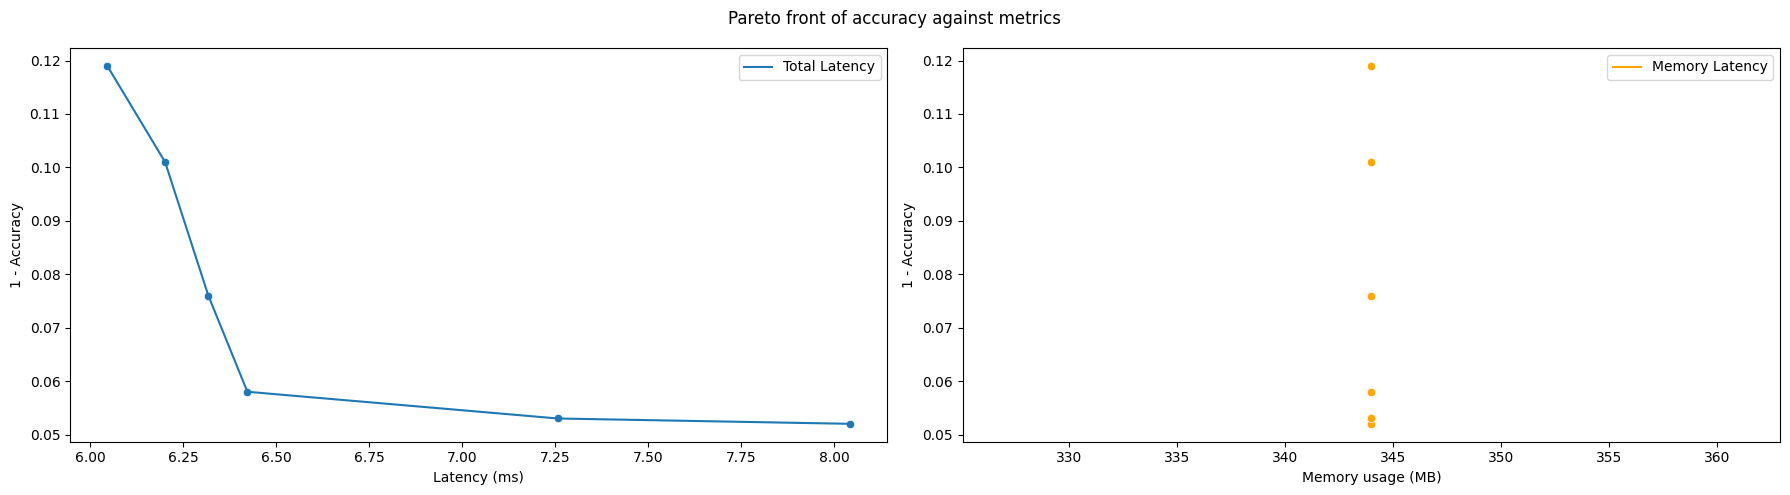

In [7]:

pareto_inference = utils.get_pareto(prunning_data, "Total Latency")
pareto_memory = utils.get_pareto(prunning_data, "Max Mem use")
fig, axes = plt.subplots(1,2, figsize=(18, 5))
sns.lineplot(x=pareto_inference[1], y=pareto_inference[0],errorbar=None, label="Total Latency", ax=axes[0])
sns.scatterplot(prunning_data, x="Total Latency", y="Accuracy", ax=axes[0])
axes[0].set_ylabel("1 - Accuracy")
axes[0].set_xlabel("Latency (ms)")
axes[0].legend()

sns.lineplot(x=pareto_memory[1], y=pareto_memory[0],errorbar=None, label="Memory Latency", ax=axes[1], color='orange')
sns.scatterplot(prunning_data, x="Max Mem use", y="Accuracy", ax=axes[1], color='orange')
axes[1].set_ylabel("1 - Accuracy")
axes[1].set_xlabel("Memory usage (MB)")
axes[1].legend()


fig.suptitle("Pareto front of accuracy against metrics")
plt.tight_layout()
plt.savefig(f"summary/globalGraphs/{name}-Pareto.png")
plt.show()

In [8]:
prunning_data["Accuracy"] = 1 - prunning_data["Accuracy"]

In [9]:
diff_latency = original_time - prunning_data["Total Latency"]
diff_mem = 0
diff_acc = original_acc - prunning_data["Accuracy"]

tradeoff_latency = (diff_latency/original_time)/(diff_acc/original_acc) * (prunning_data["Accuracy"]**2)
tradeoff_mem = (diff_mem/original_mem)/(diff_acc/original_acc) * (prunning_data["Accuracy"]**2)

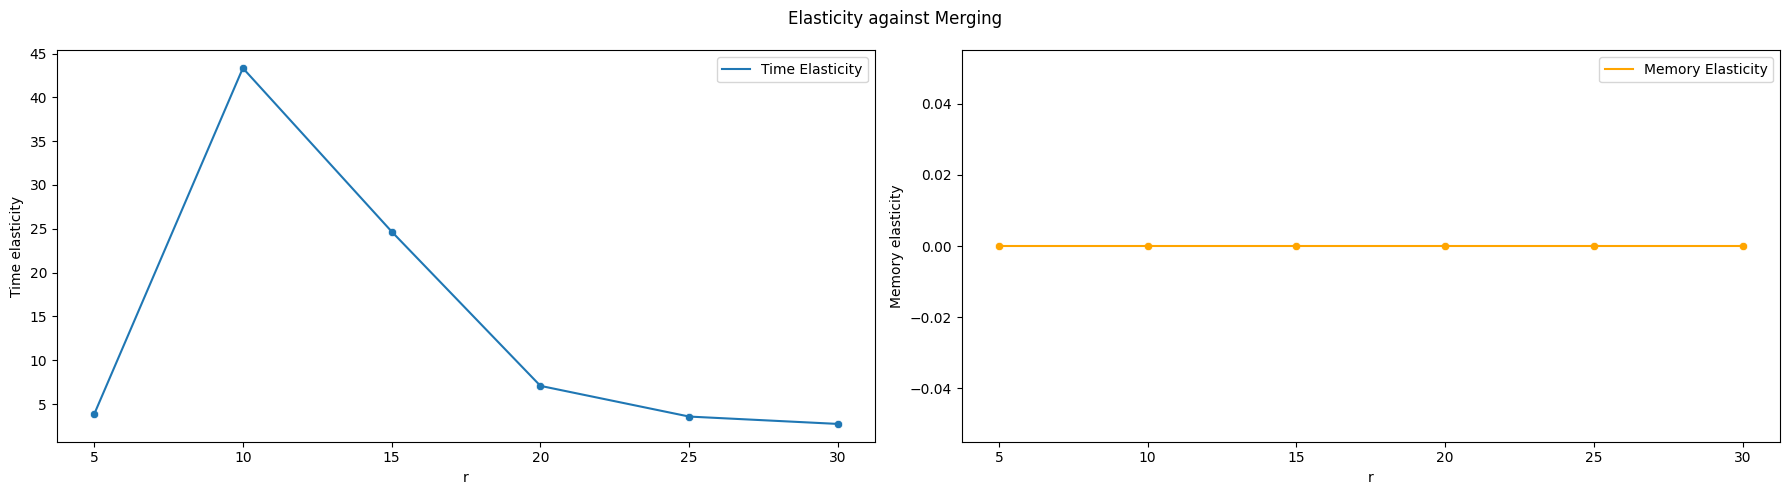

In [10]:
fig, axes = plt.subplots(1,2, figsize=(18, 5))
sns.lineplot(x=prunning_data["Prunning"], y=tradeoff_latency, label="Time Elasticity",errorbar=None, ax=axes[0])
sns.scatterplot(x=prunning_data["Prunning"], y=tradeoff_latency, ax=axes[0])
axes[0].set_ylabel("Time elasticity")
axes[0].set_xlabel("r")
axes[0].legend()

sns.lineplot(x=prunning_data["Prunning"], y=tradeoff_mem ,errorbar=None, label="Memory Elasticity", ax=axes[1], color='orange')
sns.scatterplot(x=prunning_data["Prunning"], y=tradeoff_mem, ax=axes[1], color='orange')
axes[1].set_ylabel("Memory elasticity")
axes[1].set_xlabel("r")
axes[1].legend()


fig.suptitle(f"Elasticity against {name}")
plt.tight_layout()
plt.savefig(f"summary/globalGraphs/{name}-Elasticity.png")
plt.show()